In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.15.0-dev20190821


In [ ]:

dataset_path = "tealeaf_chlorophyll3.csv"
dataset_path

In [ ]:
#column_names = ['mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b','variance','kurtosis','skewness','Chlorophyll']
column_names = ['mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b','variance','stddv_h','stddv_s','stddv_v','kurtosis','skewness','Chlorophyll']
raw_dataset = pd.read_csv(dataset_path, names=column_names)

dataset = raw_dataset.copy()
dataset.tail()

,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,variance,stddv_h,stddv_s,stddv_v,kurtosis,skewness,Chlorophyll
745,139.582299,140.753970,140.240926,22.602668,20.064791,26.711467,542.556273,40.430492,41.138946,19.536122,16.162807,-3.540260,17.9
746,2.259592,2.846533,1.241938,17.173273,19.055322,16.287623,308.210510,15.634769,41.325513,34.441508,156.224934,11.844060,18.4
747,122.549940,122.969325,122.661009,20.670290,18.396400,24.082963,448.590647,53.385132,42.569241,17.979409,14.804456,-3.341167,23.3
748,134.930656,132.359129,128.683949,22.810617,20.301009,26.130840,544.996560,16.981913,41.753718,21.055833,12.771981,-2.975765,19.4
749,130.578278,130.886389,130.104314,21.440766,19.209804,25.386724,491.173068,48.884553,41.737242,19.107710,15.114559,-3.354330,21.6


In [ ]:
dataset.isna().sum()

mean_r         0
mean_g         0
mean_b         0
stddev_r       0
stddev_g       0
stddev_b       0
variance       0
stddv_h        0
stddv_s        0
stddv_v        0
kurtosis       0
skewness       0
Chlorophyll    0
dtype: int64

In [ ]:
dataset = dataset.dropna()

In [ ]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)


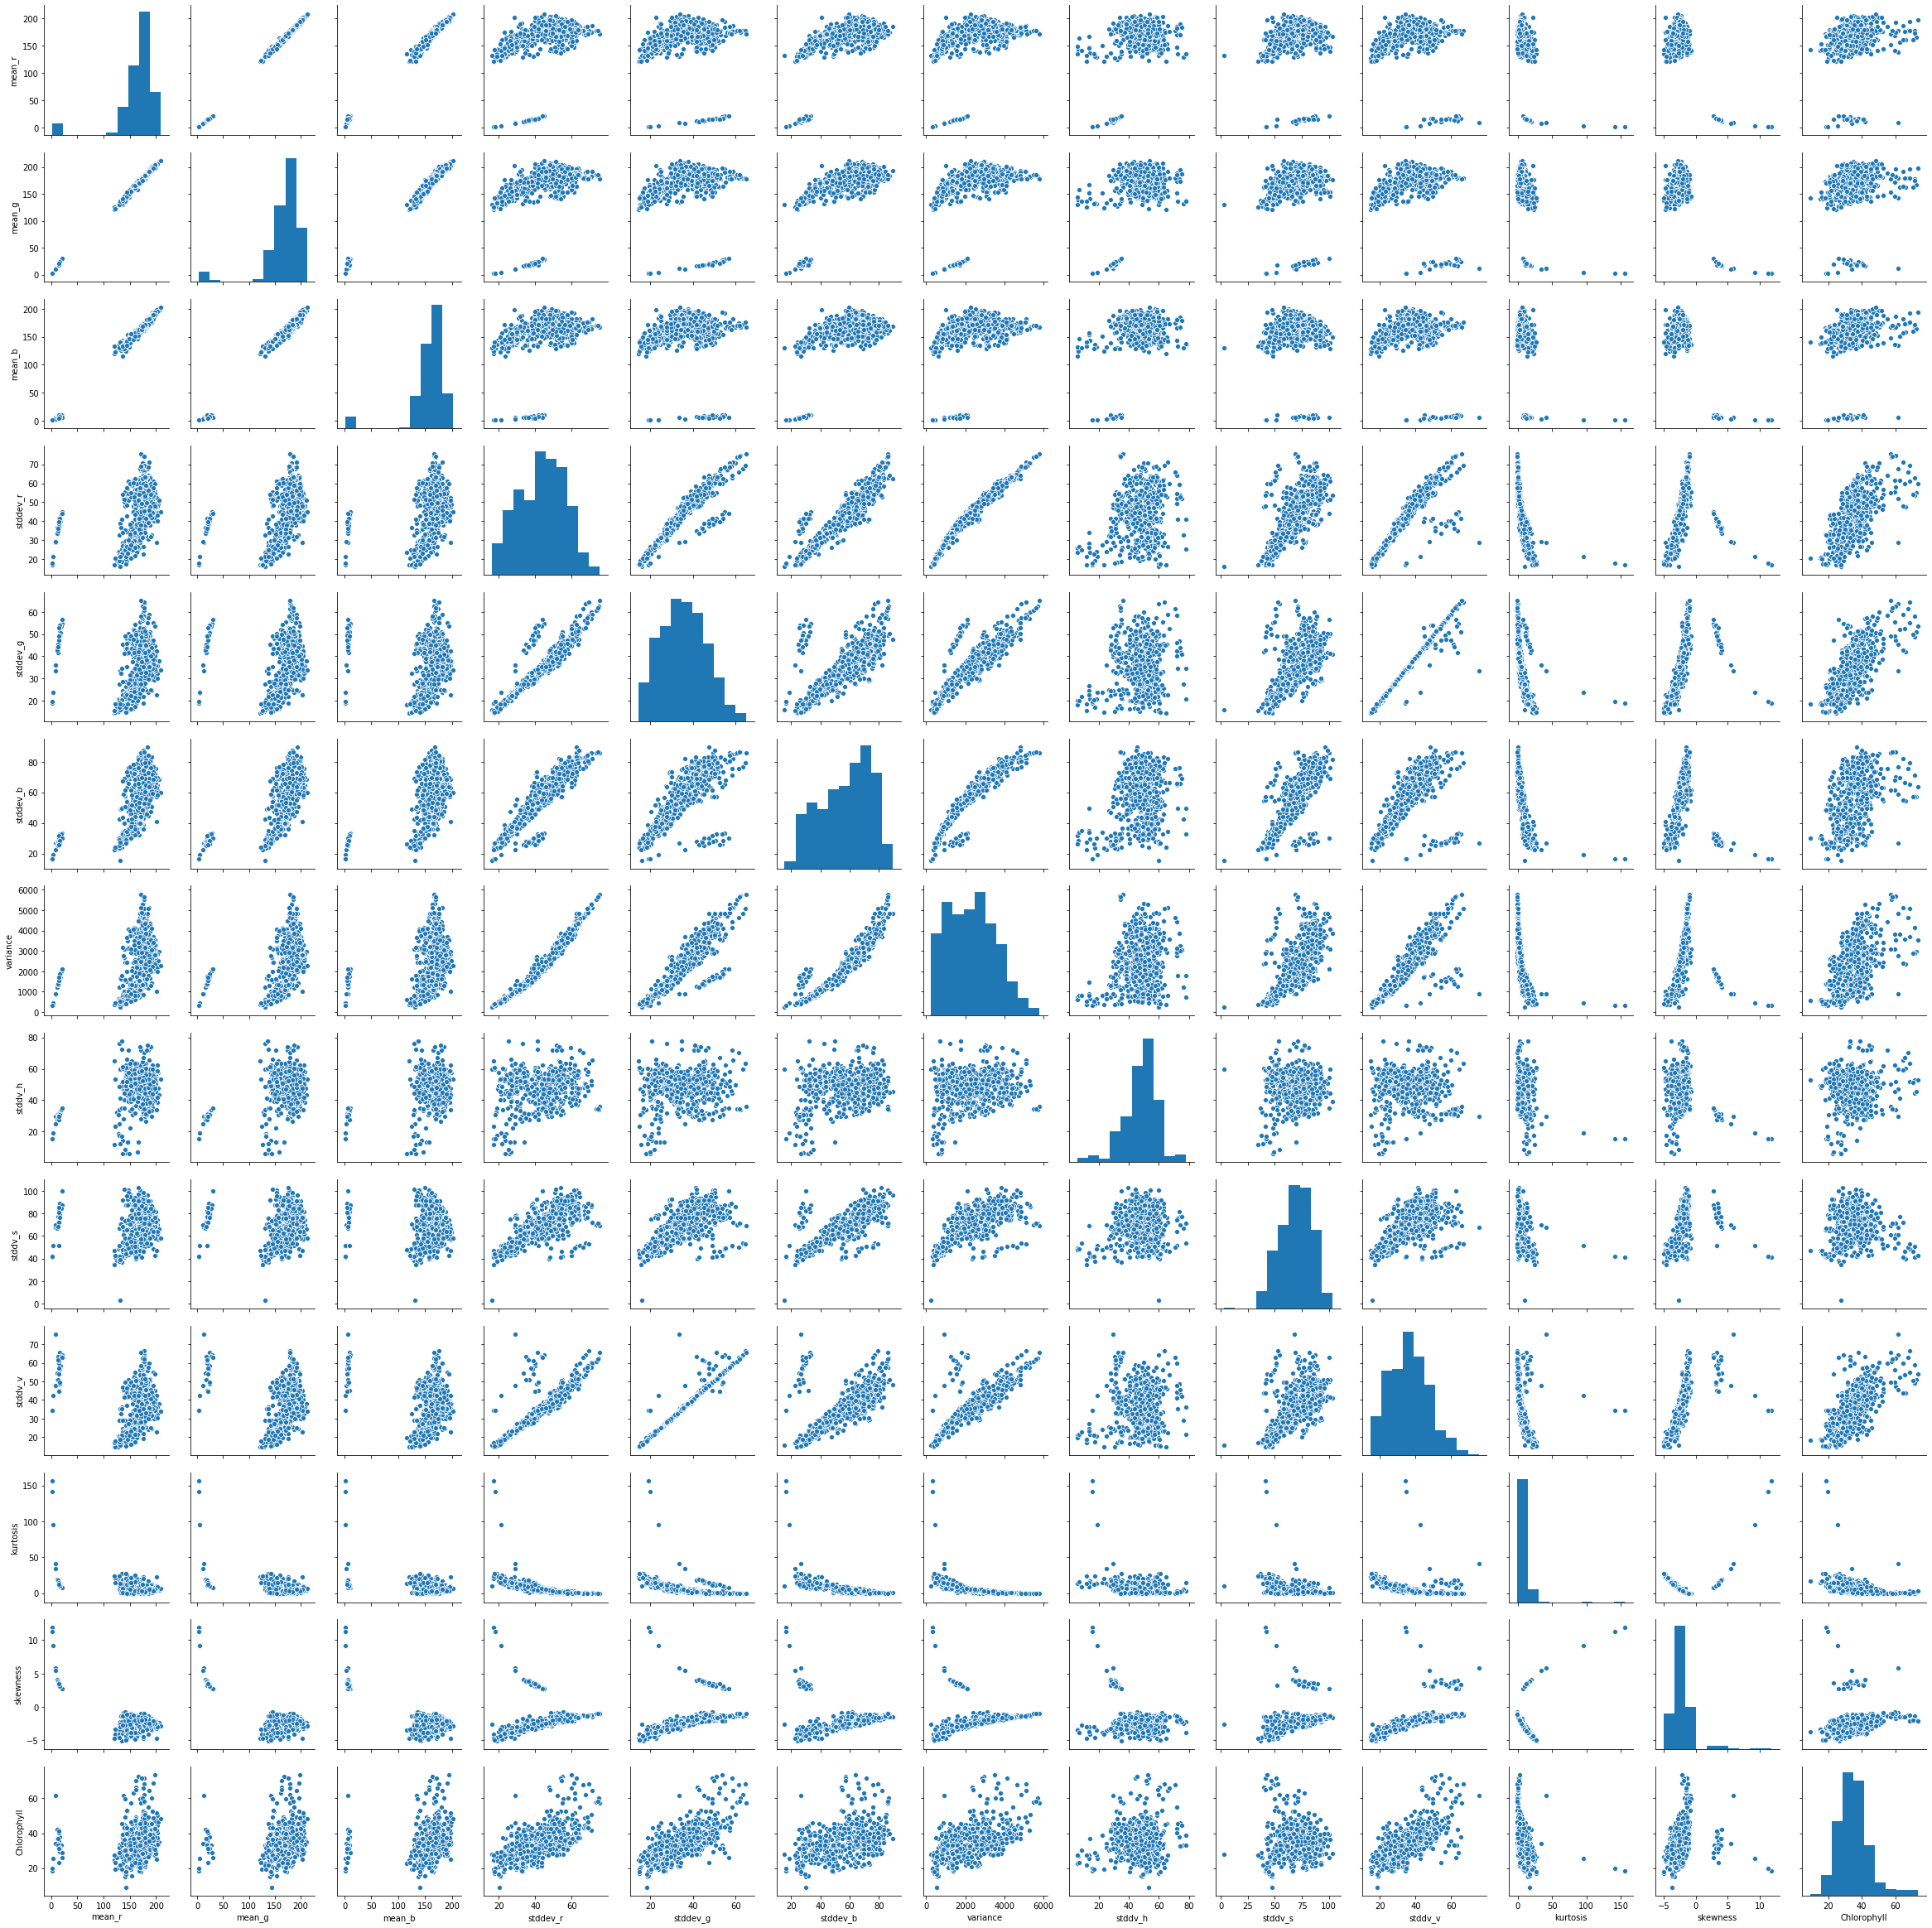

In [ ]:
sns.pairplot(train_dataset[["mean_r","mean_g","mean_b","stddev_r","stddev_g","stddev_b","variance","stddv_h","stddv_s","stddv_v","kurtosis","skewness","Chlorophyll"]])
#sns.pairplot(train_dataset[["mean_r","mean_g","mean_b","Chlorophyll"]])

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("Chlorophyll")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
mean_r,600.0,163.713504,35.278014,2.259592,155.708689,171.119742,181.233630,208.403165
mean_g,600.0,167.609492,35.660788,2.846533,158.438651,175.656806,186.003606,212.083648
mean_b,600.0,157.664679,34.957700,1.241938,150.087890,164.920874,174.552447,202.984726
stddev_r,600.0,43.673676,12.766900,16.045376,33.458110,44.471460,53.125041,75.522077
stddev_g,600.0,35.611298,10.509115,14.310185,27.308885,35.081636,42.575224,65.061582
stddev_b,600.0,57.049468,16.892173,15.706908,43.617272,59.847855,70.073870,89.374280
variance,600.0,2352.250891,1203.882983,251.771557,1341.319698,2330.374385,3187.356464,5790.713337
stddv_h,600.0,47.811274,10.989896,5.941523,42.626502,49.449300,54.589521,77.827471
stddv_s,600.0,69.353246,14.619992,2.954162,58.345108,70.362010,80.059931,103.071839
stddv_v,600.0,36.365692,11.083406,14.672449,27.892757,35.527763,43.631339,75.383485


In [ ]:
train_labels = train_dataset.pop('Chlorophyll')
test_labels = test_dataset.pop('Chlorophyll')

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
print(normed_test_data)

       mean_r    mean_g    mean_b  stddev_r  stddev_g  stddev_b  variance  \
9    0.206756  0.247590  0.212260  1.951114  2.037267  1.340446  2.025040   
11  -0.078478  0.012412 -0.190095  1.314374  1.120208  1.268498  1.425447   
19   0.972627  0.972871  1.025188  0.495061  0.304457  0.317917  0.244735   
23   0.819012  0.838554  0.720504 -0.063012 -0.370513  0.398375 -0.009371   
28   0.103747  0.174781  0.031079  1.449314  1.364154  1.144695  1.454570   
..        ...       ...       ...       ...       ...       ...       ...   
713 -4.493944 -4.514009 -4.429472 -1.383507 -0.472581 -2.155138 -1.386481   
722 -1.030625 -1.075477 -0.845421 -2.110884 -2.175234 -1.900385 -1.658584   
723 -1.044333 -1.114305 -0.895299 -2.073707 -2.106137 -1.892974 -1.647301   
730 -0.880890 -0.978121 -0.657943 -1.907542 -1.739946 -1.971057 -1.610459   
737 -1.046876 -1.102923 -0.844957 -2.123800 -2.092158 -1.985694 -1.673193   

      stddv_h   stddv_s   stddv_v  kurtosis  skewness  
9    1.242677  0.73

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.0001)

  model.compile(loss='mae',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'acc'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                416       
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.2978448 ],
       [ 0.2538063 ],
       [ 0.05565809],
       [ 0.3937317 ],
       [ 0.63749754],
       [ 0.38890603],
       [-0.01409002],
       [ 0.36752486],
       [ 0.56536955],
       [ 0.39595348]], dtype=float32)

In [ ]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [ ]:
history_dict = history.history
history_dict.keys()
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,acc,val_loss,val_mean_absolute_error,val_mean_squared_error,val_acc,epoch
995,3.357280,3.357280,22.157867,0.0,3.184076,3.184076,15.348486,0.0,995
996,3.358808,3.358808,22.168699,0.0,3.181507,3.181507,15.307218,0.0,996
997,3.357416,3.357416,22.074289,0.0,3.189175,3.189175,15.406400,0.0,997
998,3.355941,3.355941,22.118744,0.0,3.181651,3.181651,15.295160,0.0,998
999,3.356267,3.356267,22.117556,0.0,3.178038,3.178038,15.235659,0.0,999


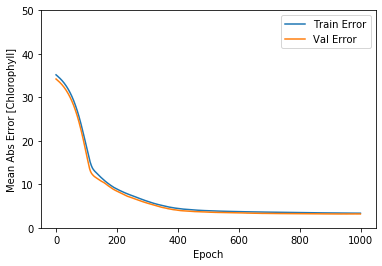

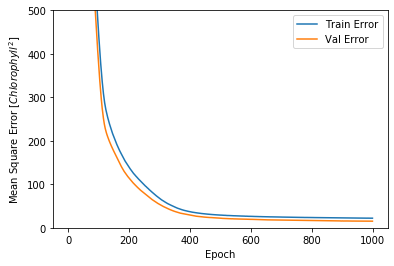

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Chlorophyll]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,50])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Chlorophyll^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,500])
  plt.legend()
  plt.show()


plot_history(history)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...

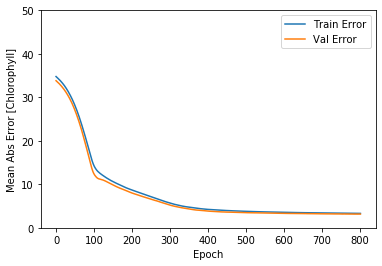

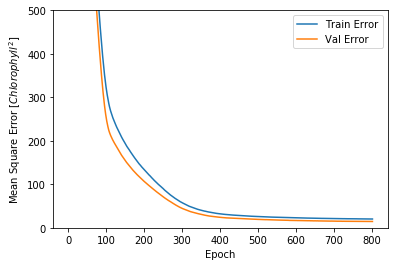

In [ ]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [ ]:
#loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)
moo = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {} chlorophyll".format(moo))

150/150 - 0s - loss: 3.4983 - mean_absolute_error: 3.4983 - mean_squared_error: 25.7804 - acc: 0.0000e+00
Testing set Mean Abs Error: [3.4983047580718996, 3.4983048, 25.7804, 0.0] chlorophyll


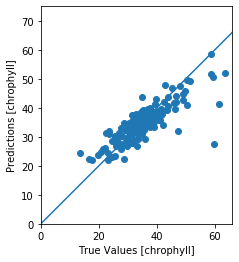

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [chrophyll]')
plt.ylabel('Predictions [chrophyll]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

9      4.855827
11    -5.232332
19    -4.099435
23     1.537383
28     1.592754
         ...   
713    4.741555
722    4.521692
723   -1.490025
730    5.467667
737   -1.233720
Name: Chlorophyll, Length: 150, dtype: float64


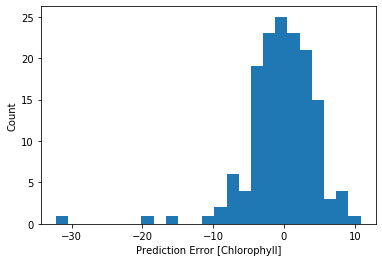

In [ ]:
error = test_predictions - test_labels
print(error)
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Chlorophyll]")
_ = plt.ylabel("Count")

In [ ]:
def Average(lst): 
    return sum(lst) / len(lst) 

avg_test_predictions = Average(test_predictions)
avg_test_labels = Average(test_labels)

print(avg_test_predictions)
print(avg_test_labels)



34.78070032755534
35.20733333333334


In [ ]:
acc  = avg_test_predictions/avg_test_labels
acc= acc * 100

In [ ]:
print(acc)

98.1633967775046


In [ ]:
# aa = 0
# ii = 0
# #print(test_predictions) 
# #print(test_labels.keys)
# test_labels.values[0]

# for i in test_predictions:
#     if test_predictions[ii] == test_labels.values[ii]:
#       aa = aa+ 1
#       ii = ii+1
#       print(aa)
#     else:
#       ii = ii +1;
#       print(ii)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150


In [ ]:
print("[INFO] Saving model...")
#pickle.dump(model,open('cnn_model.pkl', 'wb'))
model.save('myDNN_regression_model.pb')

# converter = tf.lite.TFLiteConverter.from_saved_model('my_model.pb')
# tflite_model = converter.convert()
# open("converted_model.tflite", "wb").write(tflite_model)

[INFO] Saving model...


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.stats import kurtosis, skew
from scipy.stats import moment
import natsort 

names = ['mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b','variance',
             'stddv_h','stddv_s','stddv_v', 'kurtosis' ,'skewness'
        ]
            
df = pd.DataFrame([], columns = names)
    

imgpath = 'tee.jpg'
main_img = cv2.imread(imgpath)
print(main_img)

[[[230 228 228]
  [230 228 228]
  [230 228 228]
  ...
  [236 234 234]
  [236 234 234]
  [236 234 234]]

 [[229 227 227]
  [229 227 227]
  [229 227 227]
  ...
  [236 234 234]
  [236 234 234]
  [235 233 233]]

 [[229 227 227]
  [229 227 227]
  [229 227 227]
  ...
  [236 234 234]
  [236 234 234]
  [235 233 233]]

 ...

 [[116 117 115]
  [115 116 114]
  [112 115 113]
  ...
  [169 178 181]
  [169 178 181]
  [166 175 178]]

 [[116 117 115]
  [113 114 112]
  [110 111 109]
  ...
  [168 177 180]
  [168 177 180]
  [167 176 179]]

 [[114 115 113]
  [111 112 110]
  [109 110 108]
  ...
  [167 176 179]
  [168 177 180]
  [167 176 179]]]


In [ ]:
#Preprocessing
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# blur = cv2.GaussianBlur(gs, (25,25),0)
# ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# kernel = np.ones((50,50),np.uint8)
# closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

#Color features
red_channel = img[:,:,0]
green_channel = img[:,:,1]
blue_channel = img[:,:,2]
blue_channel[blue_channel == 255] = 0
green_channel[green_channel == 255] = 0
red_channel[red_channel == 255] = 0

h_channel = hsv_img[:, :, 0]
s_channel = hsv_img[:, :, 1]
v_channel = hsv_img[:, :, 2]

red_mean = np.mean(red_channel)
green_mean = np.mean(green_channel)
blue_mean = np.mean(blue_channel)

#  h_mean = np.mean(h_channel)
#         s_mean = np.mean(s_channel)
#         v_mean = np.mean(v_channel)


red_std = np.std(red_channel)
green_std = np.std(green_channel)
blue_std = np.std(blue_channel)

h_std = np.std(h_channel)
s_std = np.std(s_channel)
v_std = np.std(v_channel)

kur = kurtosis(img, axis=None)
sk = skew(img, axis=None)
var = np.var(img, axis=None)
mom = moment(img, moment=1)
histr = cv2.calcHist([img],[0],None,[256],[0,256]) 

vector = [red_mean,green_mean,blue_mean,red_std,green_std,blue_std,var,h_std,s_std,v_std,
         kur,sk]
df_temp = pd.DataFrame([vector],columns=names)
df = df.append(df_temp)

In [ ]:
df

,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,variance,stddv_h,stddv_s,stddv_v,kurtosis,skewness
0,197.47847,203.192213,191.790658,55.235822,42.422848,68.479752,3201.722811,39.82397,65.016452,42.536723,2.693144,-2.003428


In [ ]:
df.values[0][0]

197.47847045833333

In [ ]:
normed_df = norm(df)

In [ ]:
anual_predictions = model.predict(normed_df).flatten()

# plt.scatter(test_labels, anual_predictions)
# plt.xlabel('True Values [chrophyll]')
# plt.ylabel('Predictions [chrophyll]')
# plt.axis('equal')
# plt.axis('square')
# plt.xlim([0,plt.xlim()[1]])
# plt.ylim([0,plt.ylim()[1]])
# _ = plt.plot([-100, 100], [-100, 100])

In [ ]:
print(anual_predictions)

[45.118477]
